# Groundwater Geochemistry Analysis: Yang et al. Dataset

## Learning Objectives
- Analyze real groundwater chemistry data from Yang et al. (2020)
- Apply multiple hydrogeochemical diagrams to understand water evolution
- Compare temporal and spatial variations in groundwater chemistry
- Practice data preprocessing for WQChartPy

## Dataset Description
This dataset contains groundwater chemistry data from monitoring wells, including:
- Multiple wells sampled over several years
- Seasonal variations (dry vs. wet seasons)
- Major ion concentrations
- pH and trace elements

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Yang groundwater dataset
df_raw = pd.read_csv('./datasets/yang_groundwater_sample.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df_raw.shape}")
print("\nFirst 5 rows:")
df_raw.head()

Dataset loaded successfully!
Dataset shape: (1184, 18)

First 5 rows:


,Unnamed: 0,Well,Sampling year,Sampling season,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4
0,0,J1,1992,dry,C3,#3cb44b,o,20,0.6,6.9,62.7,13.0,14.9,0.9,257.5,0,12.5,10.0
1,1,J1,1992,wet,C3,#3cb44b,o,20,0.6,7.1,68.4,14.5,13.0,0.6,277.5,0,13.8,22.5
2,2,J1,1993,dry,C3,#3cb44b,o,20,0.6,6.9,74.2,13.0,13.1,0.7,287.5,0,13.8,10.0
3,3,J1,1993,wet,C3,#3cb44b,o,20,0.6,7.9,68.4,14.5,13.0,1.3,280.0,0,12.5,5.0
4,4,J1,1994,dry,C3,#3cb44b,o,20,0.6,7.1,66.8,13.0,12.7,0.6,272.5,0,13.8,7.5


## Data Exploration and Preprocessing

In [2]:
# Examine the structure of the dataset
print("Dataset Information:")
print("===================")
print(f"Number of samples: {len(df_raw)}")
print(f"Number of wells: {df_raw['Well'].nunique()}")
print(f"Wells: {df_raw['Well'].unique()}")
print(f"Years covered: {df_raw['Sampling year'].min()} - {df_raw['Sampling year'].max()}")
print(f"Seasons: {df_raw['Sampling season'].unique()}")

print("\nBasic statistics for major ions (mg/L):")
ion_cols = ['Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'HCO3']
df_raw[ion_cols].describe().round(2)

Dataset Information:
Number of samples: 1184
Number of wells: 29
Wells: ['J1' 'J10' 'J11' 'J12' 'J13' 'J14' 'J15' 'J16' 'J17' 'J18' 'J19' 'J2'
 'J20' 'J21' 'J22' 'J23' 'J24' 'J25' 'J26' 'J27' 'J28' 'J29' 'J3' 'J4'
 'J5' 'J6' 'J7' 'J8' 'J9']
Years covered: 1992 - 2014
Seasons: ['dry' 'wet']

Basic statistics for major ions (mg/L):


,Ca,Mg,Na,K,Cl,SO4,HCO3
count,1184.00,1184.00,1184.00,1184.00,1184.00,1184.00,1184.00
mean,103.59,25.46,28.05,1.72,26.48,12.63,460.90
std,35.37,9.84,43.03,1.33,87.78,27.71,140.05
min,31.33,7.00,0.92,0.21,0.01,0.01,170.00
25%,70.91,18.00,13.32,0.89,2.50,1.00,355.02
50%,99.78,24.00,20.37,1.30,6.25,2.00,440.00
75%,134.39,30.50,31.24,2.14,17.50,10.00,567.52
max,222.46,70.00,593.61,16.72,994.10,250.00,925.00


## Hydrogeochemical Analysis

### 1. Piper Diagrams - Understanding Water Types

Trilinear Piper plot created. Saving it to /workspaces/hwrs564a_course_materials_arbennett/content_weekly/week_05 



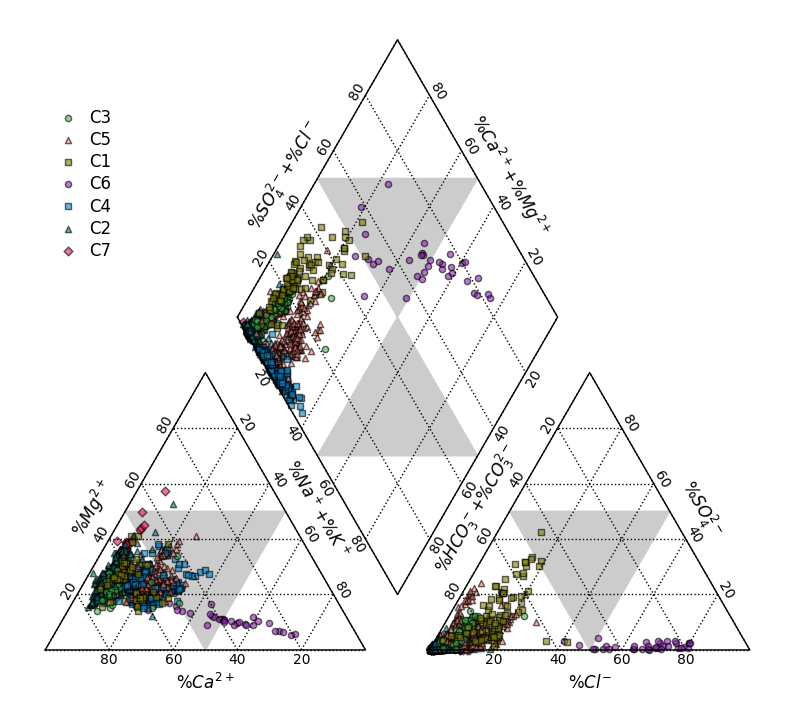

In [3]:
# Create triangle Piper diagram for all samples
from wqchartpy import triangle_piper

# Create Piper diagram
triangle_piper.plot(
    df_raw, unit='mg/L', 
    figname='./plots/yang_piper_diagram', figformat='png'
)

### 2. Temporal Analysis - Seasonal Variations

Trilinear Piper plot created. Saving it to /workspaces/hwrs564a_course_materials_arbennett/content_weekly/week_05 

Seasonal comparison Piper diagram created!
Red circles = Dry season, Blue squares = Wet season


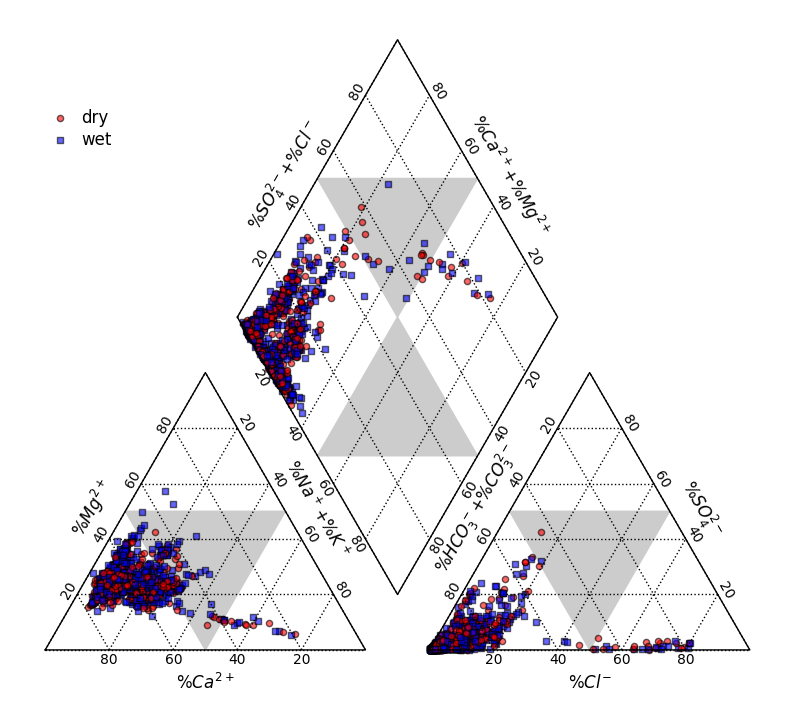

In [4]:
# Create separate plots for seasonal comparison
# Modify data to show seasonal differences
df_seasonal = df_raw.copy()
df_seasonal['Label'] = df_seasonal['Sampling season']

# Assign different colors for seasons
df_seasonal.loc[df_seasonal['Sampling season'] == 'dry', 'Color'] = 'red'
df_seasonal.loc[df_seasonal['Sampling season'] == 'wet', 'Color'] = 'blue'

# Assign different markers for seasons
df_seasonal.loc[df_seasonal['Sampling season'] == 'dry', 'Marker'] = 'o'
df_seasonal.loc[df_seasonal['Sampling season'] == 'wet', 'Marker'] = 's'

# Create Piper diagram showing seasonal differences
triangle_piper.plot(
    df_seasonal, unit='mg/L', 
    figname='./plots/yang_piper_seasonal_comparison', figformat='png'
)

print("Seasonal comparison Piper diagram created!")
print("Red circles = Dry season, Blue squares = Wet season")